In [2]:
import thorsky.thorskyclasses3 as tsc3
import thorsky.thorskyutil as tsu
import astropy.units as u
import matplotlib.pyplot as plt
from dateutil import tz
from datetime import datetime
obs = tsc3.Observation()
obs.setsite('pgs')  
print(obs.site.name,obs.site.location.lon.to_string(),obs.site.location.lat.to_string())

PrestonGottskyview -101d57m29.88992347s 33d44m53.16836394s


---

## Helper functions

In [3]:

def compute_value(b):
    obs.computesky()
    
    #print('Body:{}'.format(b))
    #print("airmass:",obs.airmass)
    obs.computesunmoon()
    #print("sun alt:",(obs.sunaltit.degree))
    #print("moon alt:",(obs.moonaltit.degree))
    #print("HA:",(obs.hanow))
    #print('current_date(UTC):{}'.format(d))
    airmass = obs.airmass
    sunalt = obs.sunaltit.degree
    monalt = obs.moonaltit.degree
    HA = obs.hanow
    return airmass , sunalt , monalt , HA



In [4]:


def utc_to_local():
    from_zone = tz.tzutc()
    to_zone = tz.tzlocal()
    UTC = obs.t.to_datetime().strftime("%a  %Y-%m-%d  %H:%M:%S")
    utc = datetime.strptime(UTC, '%a  %Y-%m-%d  %H:%M:%S')
    utc = utc.replace(tzinfo=from_zone)
    central = utc.astimezone(to_zone)
    central = central.strftime('%a  %Y-%m-%d  %H:%M:%S')
    return central


In [5]:


def airmass_plot(star_name,data):
    airmass = []
    UT = []
    a = finder(star_name,data)
    plt.xlabel('UTC')
    plt.ylabel('airmass')
    plt.title('{}'.format(star_name))
    for k in a:
        airmass.append(data.iloc[k]['airmass'])
        UT.append(data.iloc[k]['UT'])
        plt.plot(UT,airmass)

    plt.show()

In [6]:
def finder(name,df):
    a = df[df['name']==name].index.values
    print(final_df.iloc[a])
    return a
    

In [7]:
def calc(m,d,y,no_steps):
    month = str(m)
    day = str(d)
    year = str(y)
    start_date = '{}-{}-{}'.format(year,month,day)

    h = '20'
    m = '00'
    sec = '00'
    start_time = '{}:{}:{}'.format(h,m,sec)

    step = '1 h'

    a = True
    count = 0

    no_of_star = len(df['name'])

    for i in range(no_of_star):
        count = 0
        globals()[('airmass_{}'.format(df['name'][i]))] = []
        globals()[('sunalt_{}'.format(df['name'][i]))] = []
        globals()[('moonalt_{}'.format(df['name'][i]))] = []
        globals()[('HA_{}'.format(df['name'][i]))] = []
        globals()[('UT_{}'.format(df['name'][i]))] = []
        globals()[('local_{}'.format(df['name'][i]))] = []


        

        for k in range(no_of_steps):
            obj = (('{}  {}  {}').format(df['RA'][i],df['DEC'][i],df['Equinox'][i]))
            obs.setcelest(obj)

            if count == 0:
                obs.settime('{} {}'.format(start_date,start_time))

                UT_time = obs.t.to_datetime().strftime("%a  %Y-%m-%d  %H:%M:%S").split(' ')[-1]
                globals()[('UT_{}'.format(df['name'][i]))].append(UT_time)
                local = utc_to_local()
                globals()[('local_{}'.format(df['name'][i]))].append(local)


                airmass , sunalt , monalt , HA = compute_value(df['name'][i])
                #print('Start_time = {} ,Start_Date = {}'.format(start_time,start_date))
                globals()[('airmass_{}'.format(df['name'][i]))].append(airmass)
                #print(airmass,df['name'][i])
                globals()[('sunalt_{}'.format(df['name'][i]))].append(sunalt)
                globals()[('moonalt_{}'.format(df['name'][i]))].append(monalt)
                globals()[('HA_{}'.format(df['name'][i]))].append(HA)
                # in_date = obs.t.to_datetime().strftime("%a  %Y-%m-%d  %H:%M:%S").split(' ')[2]
                # in_day = in_date.split('-')[2]
                count += 1
                #print(in_date)
                #print('-'*55)
            elif count != 0:
                obs.settime(obs.advancetime(step))
                
                UT_time = obs.t.to_datetime().strftime("%a  %Y-%m-%d  %H:%M:%S").split(' ')[-1]
                globals()[('UT_{}'.format(df['name'][i]))].append(UT_time)
                local = utc_to_local()
                globals()[('local_{}'.format(df['name'][i]))].append(local)
                #print(obs.t.to_datetime().strftime("%a  %Y-%m-%d  %H:%M:%S")+' '+ 'UT')
                airmass , sunalt , monalt , HA = compute_value(df['name'][i])

                globals()[('airmass_{}'.format(df['name'][i]))].append(airmass)
                globals()[('sunalt_{}'.format(df['name'][i]))].append(sunalt)
                globals()[('moonalt_{}'.format(df['name'][i]))].append(monalt)
                globals()[('HA_{}'.format(df['name'][i]))].append(HA)

                # date = obs.t.to_datetime().strftime("%a  %Y-%m-%d  %H:%M:%S").split(' ')[2]
                # day = date.split('-')[2]
                
    final_airmass = []
    final_name = []
    final_sunalt = []
    final_moonalt = []
    final_HA = []
    final_UT = []
    final_local = []

    for i in range(no_of_star):
        #globals()[('{}_count'.format(df['name'][i]))] = 0
        for k in range(len(airmass_M1)):
            if (0 < globals()[('airmass_{}'.format(df['name'][i]))][k] < 1.9):
                #print(globals()[('airmass_{}'.format(df['name'][i]))][k])
                if (globals()[('sunalt_{}'.format(df['name'][i]))][k] < -18):
                    #print(globals()[('sunalt_{}'.format(df['name'][i]))][k])
                    if (globals()[('moonalt_{}'.format(df['name'][i]))][k] < 0):
                        #print(globals()[('moonalt_{}'.format(df['name'][i]))])
                        #globals()[('{}_count'.format(df['name'][i]))] += 1
                        #print(df['name'][i],globals()[('airmass_{}'.format(df['name'][i]))][k])
                        final_name.append(df['name'][i])
                        final_airmass.append(globals()[('airmass_{}'.format(df['name'][i]))][k])
                        final_sunalt.append((globals()[('sunalt_{}'.format(df['name'][i]))][k]))
                        final_moonalt.append(globals()[('moonalt_{}'.format(df['name'][i]))][k])
                        final_HA.append((globals()[('HA_{}'.format(df['name'][i]))][k]))
                        final_UT.append(globals()[('UT_{}'.format(df['name'][i]))][k])
                        final_local.append(globals()[('local_{}'.format(df['name'][i]))][k])
    
    final_df = pd.DataFrame(columns=['name','local_datetime','HA','UT','airmass','sunalt','moonalt'])
    final_df['local_datetime'] = final_local
    final_df['name'] = final_name
    final_df['airmass'] = final_airmass
    final_df['sunalt'] = final_sunalt
    final_df['moonalt'] = final_moonalt
    final_df['HA'] = final_HA
    final_df['UT'] = final_UT




    final_df['name'].unique()
    for k in final_df['name'].unique():
        count = 0
        a = []
        for i in range(len(final_df['name'])):
            if final_df['name'][i] == k:
                count+=1
                a.append(i)
        if count < 3:
            final_df.loc[a,['name','airmass','sunalt','moonalt']] = np.nan

    final_df.dropna(inplace=True)
    final_df.reset_index(drop=True,inplace=True)

                
    return final_df , start_date 

    
        

In [8]:
def index_extractor(df,col,num):
    index = df.index
    condition = df[col] == num
    test_indices = index[condition]
    test = test_indices.to_list()
    print(test)
    return test

---

In [9]:
import pandas as pd
## input the catalog you want to observe 
    ## FYI NGC catalog takes long time to process 
df = pd.read_csv('Messier_processed.csv')

In [20]:
import numpy as np

#here no of steps is the number number of hrs to observe
no_of_steps = 5

observing_date = [9,21,2022]
d = observing_date[1]

while observing_date[1] == d:
    print(f'Oberving date :{observing_date[0]}-{observing_date[1]}-{observing_date[2]}')
    m = observing_date[0]
    d = observing_date[1]
    y = observing_date[2]
    final_df,start_date = calc(m,d,y,no_of_steps)
    final_df.to_csv(f'output/{start_date}_{no_of_steps}h_NGC.csv',index=False) ## make sure to create a dir "output"
    d += 1

Oberving date :9-21-2022


In [12]:
## Shows the objects and how long it's visbile 

date = f'{observing_date[2]}-{observing_date[0]}-{observing_date[1]}'

final_df = pd.read_csv('output/{}_{}h_NGC.csv'.format(date,no_of_steps))

result = final_df['name'].value_counts()
print(result)

M2      3
M15     3
M27     3
M29     3
M31     3
M32     3
M39     3
M52     3
M56     3
M57     3
M71     3
M72     3
M73     3
M92     3
M103    3
M110    3
Name: name, dtype: int64


In [13]:
## Run this if you want to filter the objects wrt (Here objects less than 4 hours is taken)

for i in range(len(result)):
    if result[i] <= 4:
        print(result.index.tolist()[i])


M2
M15
M27
M29
M31
M32
M39
M52
M56
M57
M71
M72
M73
M92
M103
M110


In [21]:
## Use finder to find the details of the choosen target/object

a = finder('M110',final_df)

    name             local_datetime                  HA        UT   airmass  \
45  M110  Wed  2022-09-21  22:00:00  -4h25m13.23720275s  03:00:00  1.611215   
46  M110  Wed  2022-09-21  23:00:00  -3h25m03.38074271s  04:00:00  1.317714   
47  M110  Thu  2022-09-22  00:00:00  -2h24m53.52424234s  05:00:00  1.148484   

       sunalt    moonalt  
45 -28.127004 -33.939222  
46 -39.204180 -35.976310  
47 -48.540368 -34.602402  


   name             local_datetime                 HA        UT   airmass  \
27  M57  Wed  2022-09-21  22:00:00  1h21m10.73597522s  03:00:00  1.045157   
28  M57  Wed  2022-09-21  23:00:00  2h21m20.59243525s  04:00:00  1.146882   
29  M57  Thu  2022-09-22  00:00:00  3h21m30.44893562s  05:00:00  1.336448   

       sunalt    moonalt  
27 -28.127004 -33.939222  
28 -39.204180 -35.976310  
29 -48.540368 -34.602402  


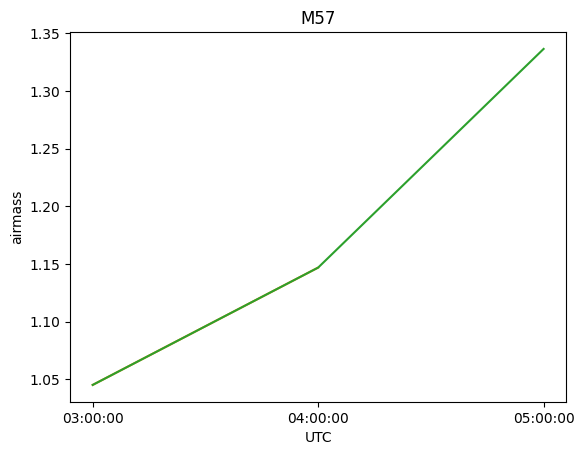

In [23]:
## Generates the details and airmass plot of the given target 
airmass_plot('M57',final_df)

---